# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:25:08.381303: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:25:11.289848
2025-04-14 21:25:11.289848


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 4
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:25:06"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

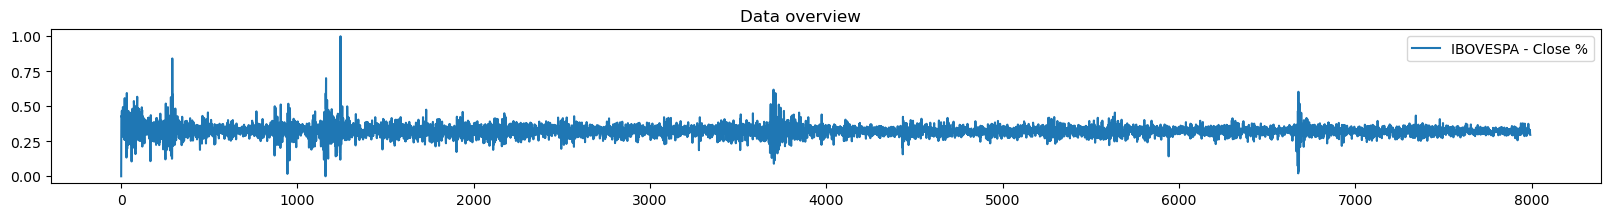

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

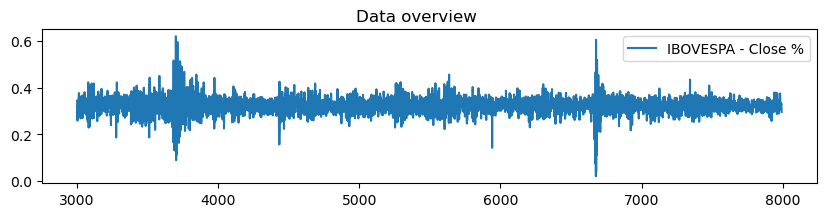

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

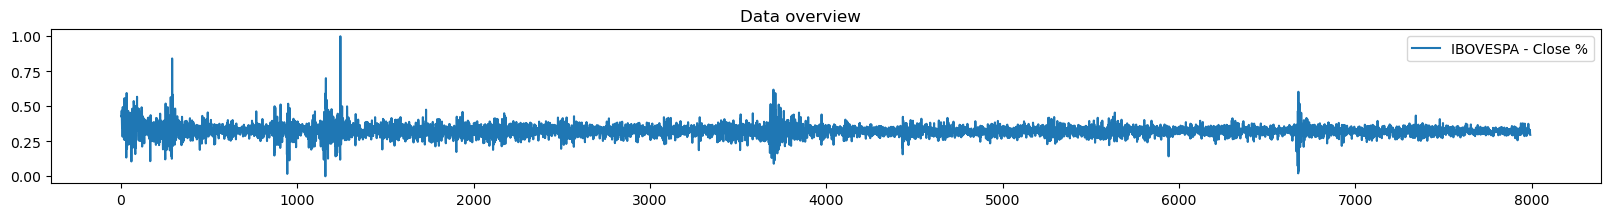

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

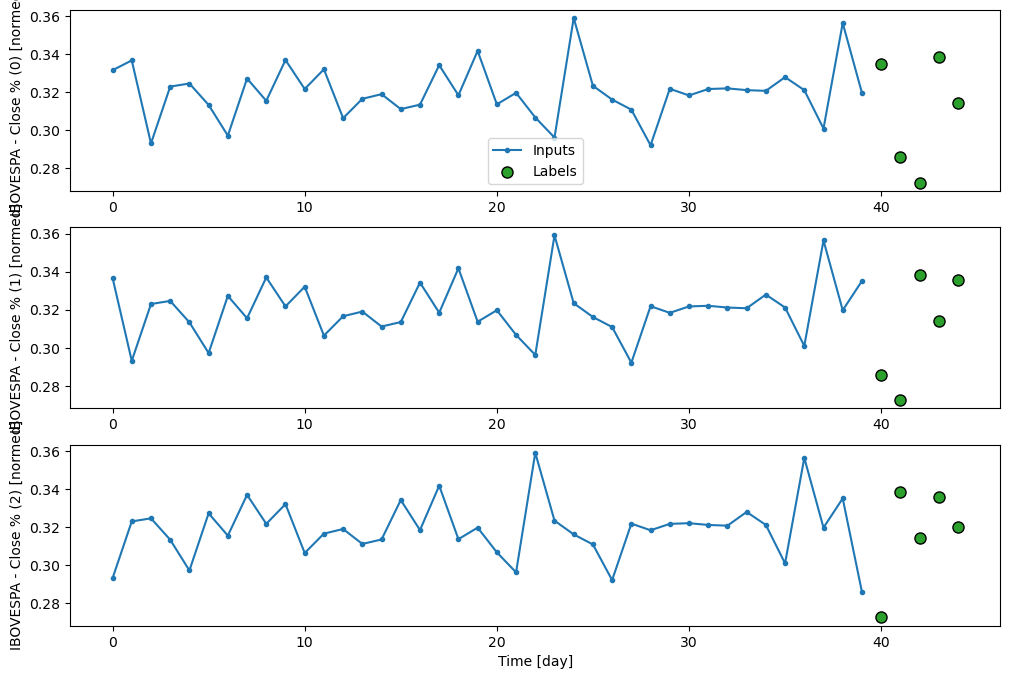

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:27 2s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 89.8674 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3295 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 80.2327 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2984

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 74.0476 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2796

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 68.5893 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2633

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 64.1793 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2497

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 60.3186 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2380

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 56.9401 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2278

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 54.9286 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2217

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 53.9907 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2188

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 52.2636 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2135

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 50.7698 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2086

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 49.4767 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2042

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 47.7018 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1981

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 22531.4766 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1927

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 40041.2734 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1880

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1451 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 53831.1719 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1837

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 64788.2617 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1796

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 73554.3203 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1759

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 80602.8125 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1724

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 86289.0078 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1692

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 90883.5703 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1661

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 94595.4609 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1632

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 97587.9141 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1605

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 99989.8594 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1580

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 101904.0625 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1556

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 103413.1875 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1533

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 104584.2422 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1511

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 105471.9531 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1490

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 106121.3047 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1470

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 106569.4688 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1451

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 106771.9766 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1439

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 106951.0312 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1421

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 107000.5625 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1404

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 106939.9219 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1388

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 106785.5000 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1372

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 106551.1797 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1357

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 106134.6719 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1338

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 105757.0312 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1324

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 105332.7109 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1311

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 104868.8125 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1298

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 104371.4297 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1286

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 103845.8438 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1275

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 103296.6094 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1264

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 102727.6875 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1253

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 102142.5078 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1242

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 101544.0703 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1232

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 100934.9609 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1222

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 100317.4688 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1212

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 99693.5547 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1202 

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 98854.6328 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1190

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 98222.0781 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1181

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 97588.0469 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1173

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 96953.6406 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1164

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 96319.8125 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1156

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 95687.3906 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1148

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 94847.6094 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1137

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 94221.1406 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1130

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 93598.1562 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1122

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 92979.1016 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1115

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 92160.4688 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1106

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 91552.0000 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1099

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 90948.5547 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1092

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 90152.1641 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1083

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 89561.2578 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1077

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 88976.0000 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1071

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 88396.5234 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1065

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 87822.9141 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1059

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 87255.2500 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1053

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 86693.5859 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1047

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 86322.5078 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1043

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 85770.9453 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1037

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 85225.4609 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1032

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 84686.0625 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1027

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 84152.7500 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1021

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 83625.5000 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1016

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 83104.2891 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1011

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 82589.0859 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1006

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 82079.8672 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1001

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 81576.5703 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0997

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 81081.1172 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0992 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9516 - val_mean_squared_error: 2.6208e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 28.5280 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1014

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.8958 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.0421 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0898

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.1467 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.5088 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.7102 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.6282 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.8541 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.1689 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.7212 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4890 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8264.1416 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 29176.5527 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 45528.3828 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 58447.7266 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 68738.8828 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 76987.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83628.9766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 88990.6406 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 93323.7031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96822.7578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99640.3672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101897.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103690.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105097.9062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106481.7734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107215.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107733.6953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108069.7422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108281.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108293.0469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108146.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107935.1250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107542.1406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107044.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106463.1016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105981.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105468.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104928.1875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104365.3516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103783.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103186.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102577.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101957.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101330.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100697.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100059.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99419.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600 

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98778.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98136.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97494.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96854.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96216.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95581.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94949.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94321.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93698.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93079.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92464.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91855.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91252.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90654.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90061.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89475.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88894.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88320.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87751.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87189.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86633.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86083.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85539.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85001.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84469.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83944.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83424.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82911.5625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82404.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82071.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9320 - val_mean_squared_error: 2.5922e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.5077 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.8902 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0449 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.1411 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.4992 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6988 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.8796 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0905 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.3675 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.7867 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.5689 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.3464 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 21715.0312 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 38612.0156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 51919.4258 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62493.2656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 70952.8281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77754.9766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 83242.5312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87676.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91259.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94147.1797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 96465.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 98313.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 99769.7578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 100900.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 101757.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 102384.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 102817.0781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 103085.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 103214.8047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 103225.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 103135.5859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 102959.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 102710.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 102399.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 102035.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 101626.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 101179.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 100699.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100192.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 99662.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 99113.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 98549.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 97972.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97384.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96788.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96187.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 95580.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 94971.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94359.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 93747.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93136.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 92525.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 91916.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 91310.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90707.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 90107.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 89511.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88919.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88332.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87750.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 87173.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86601.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86035.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85474.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84918.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84369.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83825.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83287.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 82755.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82229.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81708.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81194.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80685.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80182.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 79685.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 79194.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 78708.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 78230.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7506 - val_mean_squared_error: 2.3393e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.5564 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 24.8718 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0390 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 23.1685 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.5377 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.7399 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.9180 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 20.1317 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4120 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.8326 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6232 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.4113 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 21822.8555 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 38803.7656 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 52177.2695 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62803.6289 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 71305.2109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 78141.1484 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 83655.9688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88112.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91712.3125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 94614.7891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96944.5859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98801.3672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100265.3047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 101401.3828 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 102262.6641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 102892.7734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 103327.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 103597.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 103727.4922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 103738.3125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 103647.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 103471.2188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 103221.1016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102908.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 102542.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 102131.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 101681.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 101199.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 100690.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 100157.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 99606.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620 

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 99038.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 98458.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97868.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 97269.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 96664.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 96258.9688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 95851.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 95442.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94828.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 94213.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 93598.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 92985.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92373.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 91763.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 91157.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 90554.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 89956.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 89361.4609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 88771.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88186.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 87606.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87031.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 86462.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 85898.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 85340.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 84788.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84241.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 83701.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83166.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 82637.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 82114.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 81597.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81086.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 80580.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80081.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 79587.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 79099.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 78619.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7589 - val_mean_squared_error: 2.3406e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.5481 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 24.8414 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0948 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.2145 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.5406 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.9822 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 22.2056 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.3863 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.5930 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.8598 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 19.2602 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 19.1002 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.8535 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 15660.0498 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 34694.5703 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 49633.6719 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 61471.7656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 70923.1797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 78511.6016 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 84627.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 89568.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93560.8750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 96782.6484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99373.2266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101443.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103082.4297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104361.8984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105340.5156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106066.3359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106579.0078 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 106911.4453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107091.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107141.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107080.6953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 106926.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106692.0078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106389.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106028.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105618.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105167.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104679.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104162.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103620.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103056.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102476.0703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101881.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101274.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100658.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100036.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99408.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98776.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98142.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97507.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96872.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96238.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95605.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94975.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94348.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93724.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93104.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92489.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91878.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91272.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90671.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90076.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89486.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88902.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88324.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87751.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87185.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86625.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86070.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85522.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84980.4219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84444.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83914.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83390.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82872.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82360.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81854.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81191.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7950 - val_mean_squared_error: 2.3855e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.5173 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 24.0169 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3314 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 23.2093 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.5210 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.7055 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.9006 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 20.1210 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.4267 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.9625 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.7184 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8211.3730 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 28989.3887 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 45236.1289 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 58072.4414 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 68297.4609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 76493.2734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83091.8594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88419.0625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92724.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96200.8359 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99000.3438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101242.9062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103024.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104422.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105500.5547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106309.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 106891.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107282.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107511.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107602.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107576.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107451.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107241.7734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106959.5469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106615.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106219.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105779.2031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105301.0000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104790.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104254.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103694.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103117.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102523.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101918.4141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101302.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100679.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100050.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99417.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98781.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98143.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97505.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96868.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96232.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95598.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94967.5469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94548.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93923.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93302.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92685.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92073.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91466.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90865.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90269.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89678.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89094.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88515.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87942.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87375.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86814.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86260.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85711.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85169.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84632.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84102.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83578.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83060.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82548.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82042.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 81543.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7844 - val_mean_squared_error: 2.3727e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.5125 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.8594 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.0795 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 23.2849 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.6889 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.9021 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0845

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 21.0832 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 20.2880 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.5550 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.9589 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.7205 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.4825 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22582.6738 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 40155.2578 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 53994.7422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 64991.3594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 73789.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 80863.2969 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84801.6250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86570.2734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 88217.7031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89752.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91181.7266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92513.1172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94907.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95981.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97910.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100321.9375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102243.4219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103758.3672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 104934.0234 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 105825.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 106477.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 106927.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107206.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107341.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107352.3906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107258.8047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107075.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106817.1484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106493.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106114.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105689.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105224.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104725.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104197.9531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103647.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103076.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102489.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101888.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101277.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100658.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100032.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99401.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600 

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98767.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98132.2266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97495.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96859.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96224.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95591.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94960.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94333.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93709.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93089.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92474.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91864.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91258.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90658.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90063.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89474.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88891.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88313.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87742.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87176.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86617.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86063.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85516.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84975.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84440.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83911.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83388.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82871.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82360.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 81855.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 81358.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8029 - val_mean_squared_error: 2.3966e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4808 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.8579 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.0377 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.2142 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.6115 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.8241 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0845

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 21.0056 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 20.2115 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.4801 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.8853 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.6474 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.4104 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 22767.8535 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 40484.7070 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 54437.8164 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 65524.7148 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 74394.7578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 81526.9609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87280.7969 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91930.1094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95686.3203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98714.5938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101145.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103082.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104610.0078 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105795.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106693.9375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107351.3516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107805.2109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108086.7891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108222.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108233.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108139.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107954.8750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107693.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107367.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106985.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106556.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106087.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105584.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105053.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104497.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103922.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103330.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102725.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102109.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101484.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100853.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100217.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99578.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98937.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98296.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97654.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97014.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96375.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95740.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95107.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94478.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93853.9688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93233.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92618.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92007.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91402.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90803.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90209.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89620.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89038.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88462.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87892.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87328.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86770.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86218.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85672.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85133.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84599.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84072.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83551.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83036.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82527.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82026.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8904 - val_mean_squared_error: 2.5178e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4419 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9155 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0965 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0616 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.7687 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.0215 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.1881 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.3827 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.6104 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 18.9277 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4769 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2471 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8333.0986 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 29421.0000 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 45910.0508 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 58937.8125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 69315.3359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77633.3906 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84330.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89737.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94106.4922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97634.9141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100476.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102752.1875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104560.4297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105979.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107073.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107894.2266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108485.1953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108881.9453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109114.2031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109206.8438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109180.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109053.7109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108840.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108554.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108205.2969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107803.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107356.2266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106870.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106353.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105808.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105240.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104654.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104052.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103437.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102813.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102180.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101542.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100899.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100253.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99606.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98959.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98312.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97667.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97023.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96383.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95746.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95113.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94484.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93859.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93240.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92626.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92017.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91414.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90817.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90226.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89640.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89061.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88487.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87920.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87359.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86805.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86256.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85714.6172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85178.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84648.6172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84124.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83607.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83095.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82759.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9090 - val_mean_squared_error: 2.5407e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.4240 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1008

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 24.9338 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0969 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 22.9124 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.8418 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.1437 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.3254 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.5009 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.7169 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.0006 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.4213 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.1977 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 17.9764 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 23099.8672 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 41075.6289 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 55232.6445 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 66481.5703 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 75481.2344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 82717.6641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88555.5938 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93272.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97083.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100156.4844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102622.7812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103983.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105663.1641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106974.6953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107977.8281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108721.8359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109247.3594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109588.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109772.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109823.5469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109761.6484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109603.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109363.2422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109053.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108683.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108263.3672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107800.2188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107300.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106770.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106214.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105637.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105041.8047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104431.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103810.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103179.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102540.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101897.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101249.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100599.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99948.9922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99298.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98647.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97999.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97353.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96710.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96071.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95435.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94804.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94178.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93557.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92941.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92331.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91727.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91128.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90535.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89948.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89368.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88793.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88225.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87663.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87108.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86558.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86015.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85478.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84947.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84422.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83904.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83224.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8171 - val_mean_squared_error: 2.4136e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4676 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9078 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 22.9139 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.8757 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.1895 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.3750 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.5506 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.7655 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.0475 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.4663 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.2398 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.0155 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23123.2363 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41117.1680 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 55288.4961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 66548.7891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 75557.5547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 82801.2969 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88645.1172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93367.1406 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97182.0938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100257.7266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102726.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104694.0781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106245.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107449.2109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108361.8828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109029.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109490.5469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109776.5391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109914.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109925.5938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109829.7734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109642.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109377.5469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109046.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108658.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108222.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107746.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107235.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106695.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106131.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105547.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104945.9531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104331.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103705.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103071.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102430.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101784.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101135.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100484.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99832.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99181.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98531.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97882.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97237.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96594.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95955.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95321.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94691.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94066.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93446.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92831.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92222.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91619.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91022.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90430.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89845.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89266.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88693.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88126.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87566.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87012.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86464.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85922.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85387.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84857.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84334.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83817.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83308.3750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8151 - val_mean_squared_error: 2.4110e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4560 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9160 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 22.8978 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.8321 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.1356 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.3178 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.4928 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.7090 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 18.9928 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.4132 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.1878 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 17.9646 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23167.4785 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41195.9062 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 55394.3984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 66676.2812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 75702.3125 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 80712.5781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 87000.4375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92079.5234 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96184.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99496.1562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102159.4062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104287.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105972.6641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107288.0312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108294.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109040.2969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109567.3594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109909.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110093.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110145.2344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110083.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109924.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109683.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109372.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109001.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108580.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108115.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107615.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107083.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106525.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105946.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105349.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104737.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104114.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103481.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102841.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102195.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101546.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100894.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100241.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99588.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98936.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98286.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97638.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96993.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96565.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95927.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95293.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94663.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94038.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93419.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92805.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92197.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91594.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90998.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90407.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89823.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89245.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88673.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88107.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87548.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86995.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86448.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85907.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85373.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84844.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84322.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83806.7031 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83468.0391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7863 - val_mean_squared_error: 2.3735e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4699 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9061 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 22.8936 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.8360 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.1427 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 21.3260 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 20.5013 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.7165 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 18.9993 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.4187 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.1926 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 17.9687 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 8402.7275 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23163.5234 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 41188.8672 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 55384.9336 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 66664.8828 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 69896.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 75689.3750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 80698.7734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86985.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92063.7812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96167.5547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98453.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100432.6641 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102141.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104269.9297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105437.3906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106430.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107636.7031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108275.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109021.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109395.0859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109795.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109968.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110075.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110122.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110117.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110064.3281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109968.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109753.4688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109568.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109236.4922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108848.0469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108411.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107934.2812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107596.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107064.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106507.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105928.3984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105331.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104719.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104096.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103463.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102823.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102178.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101745.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101311.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100659.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100224.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99571.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98919.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98486.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97837.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97406.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96977.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96336.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95699.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95066.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94438.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93815.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93198.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92586.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91980.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91379.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90785.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90196.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90002.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89614.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89038.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88658.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88280.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87905.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87348.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86980.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86615.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86433.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86072.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85536.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85005.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84481.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83792.3594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83453.7500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7795 - val_mean_squared_error: 2.3611e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0072


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:4s:155ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 21:26:19.392855: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 4,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:25:06',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:1m:4s:155ms',
 'TRAINING_EPOCHS': 13,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 21:26:19.726899: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4772 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 23.9574 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.5706 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 17/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 20.9675 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 22/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.6428 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 28/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.3547 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 34/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 17.8940 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 40/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 39957.1641 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 64671.0664 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80464.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92057.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 98288.3438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 102785.3281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 105036.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106271.8750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 90/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 106782.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 106772.1406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106384.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105723.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104864.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103862.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

126/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102759.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101587.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100368.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99121.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

150/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97859.9219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

156/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96593.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95540.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94284.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93042.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91816.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90609.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89424.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88069.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86747.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85457.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84378.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83323.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82123.5000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 80957.5156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537


Loss: 0.028673548251390457 - MAE: 0.028673548251390457 - MSE: 0.001801899983547628 - MAPE: 42197.14453125 - RMSE: 0.04244879260659218


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 3.9421 - mean_squared_error: 2.6631e-04 - root_mean_squared_error: 0.0163

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 3.8334 - mean_squared_error: 2.4551e-04 - root_mean_squared_error: 0.0157


Loss: 0.012238345108926296 - MAE: 0.01223834604024887 - MSE: 0.00023610529024153948 - MAPE: 3.779520034790039 - RMSE: 0.015365717932581902


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 5.9913 - mean_squared_error: 5.4814e-04 - root_mean_squared_error: 0.0234

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 5.5831 - mean_squared_error: 5.3217e-04 - root_mean_squared_error: 0.0231


Loss: 0.017308929935097694 - MAE: 0.017308929935097694 - MSE: 0.0005161238368600607 - MAPE: 5.376560688018799 - RMSE: 0.022718358784914017


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

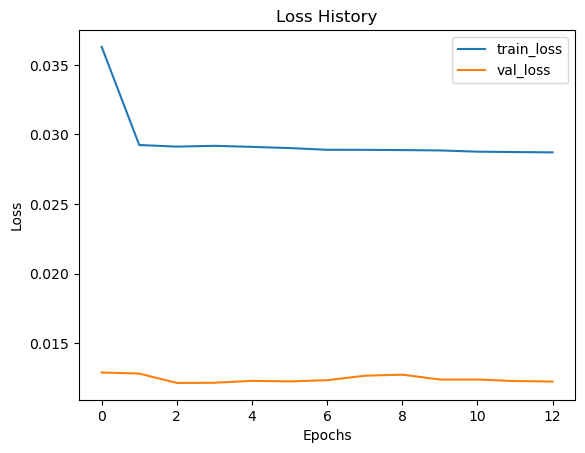

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

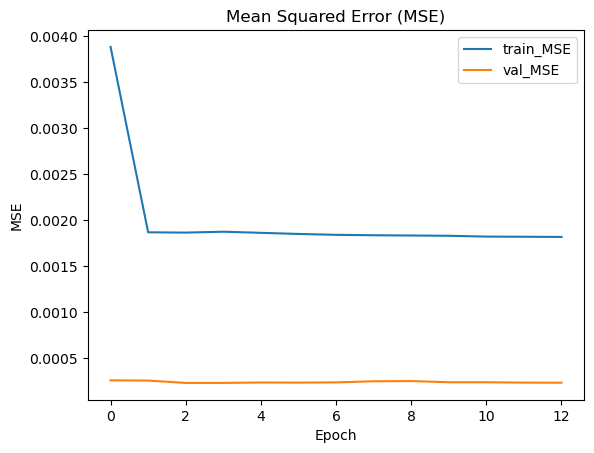

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

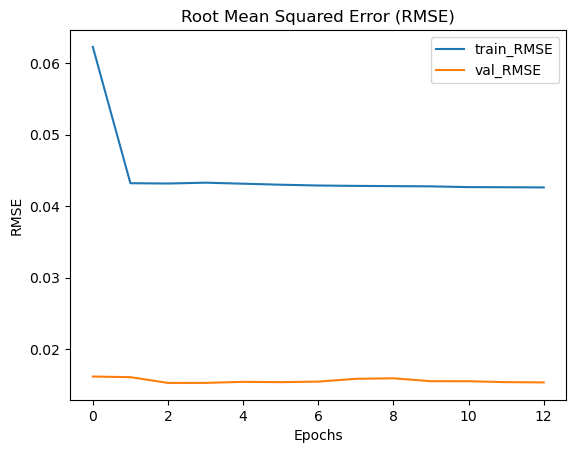

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

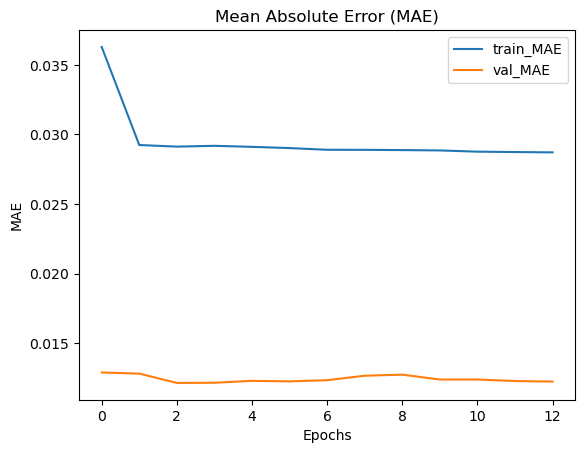

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

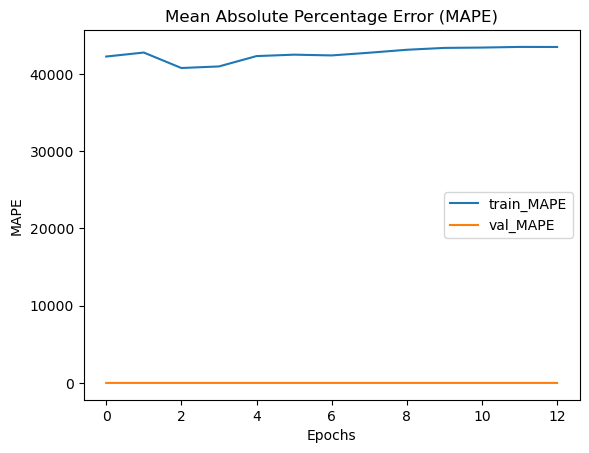

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:26:25.375938: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 1)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


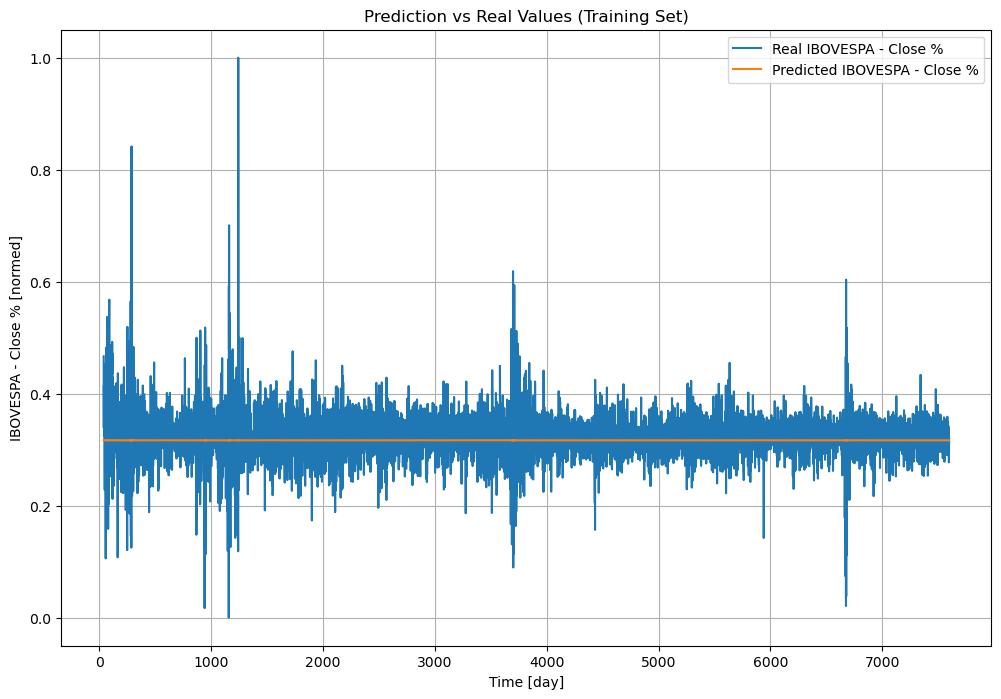

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


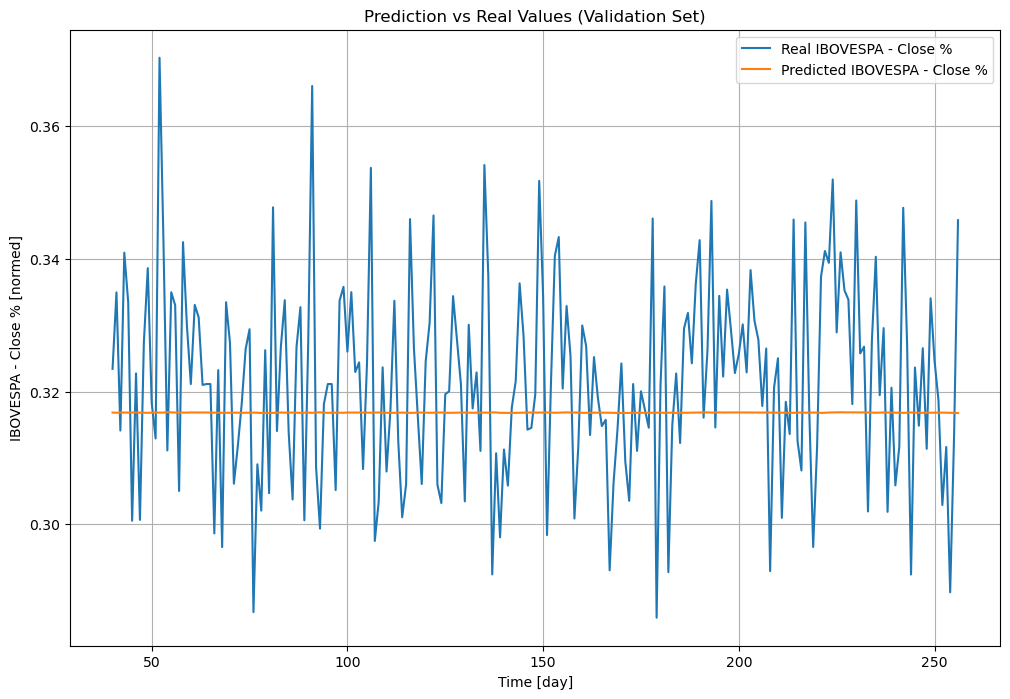

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


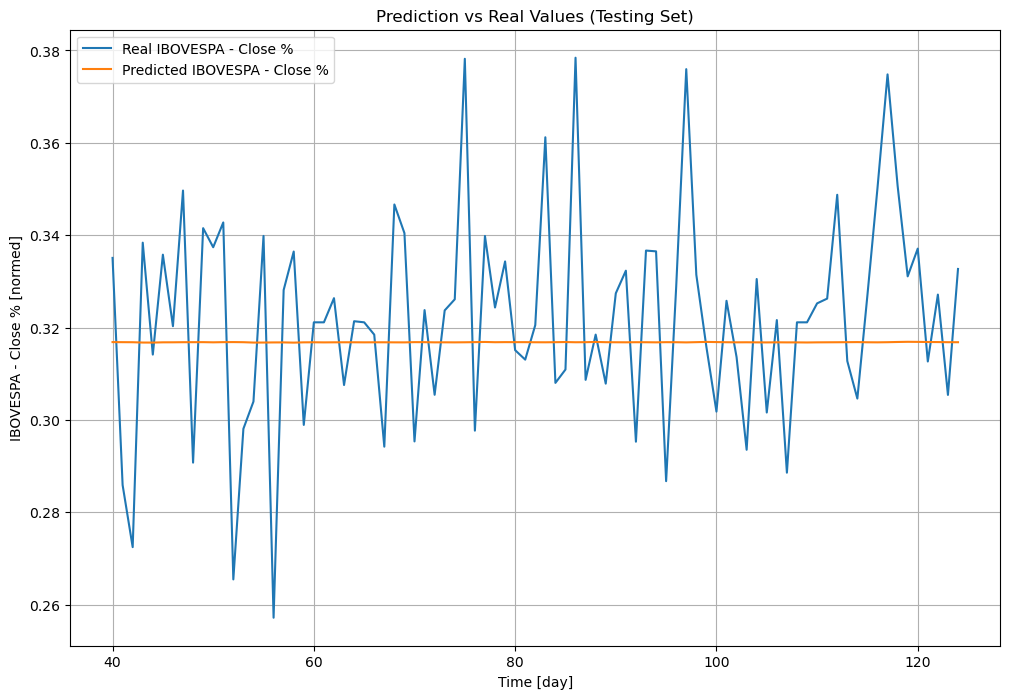

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

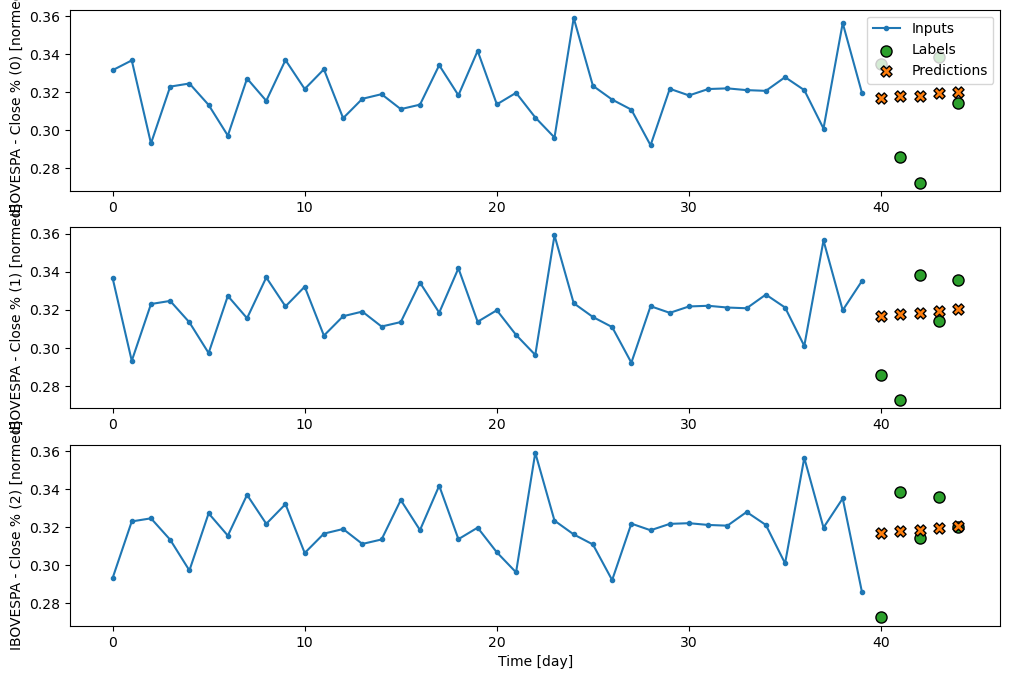

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:18s:343ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[[0.316858  , 0.316858  , 0.316858  , ..., 0.316858  ,
         0.316858  , 0.316858  ],
        [0.31779283, 0.31779283, 0.31779283, ..., 0.31779283,
         0.31779283, 0.31779283],
        [0.31825396, 0.31825396, 0.31825396, ..., 0.31825396,
         0.31825396, 0.31825396],
        [0.31958425, 0.31958425, 0.31958425, ..., 0.31958425,
         0.31958425, 0.31958425],
        [0.32029295, 0.32029295, 0.32029295, ..., 0.32029295,
         0.32029292, 0.32029292]],

       [[0.31684217, 0.31684217, 0.31684217, ..., 0.31684217,
         0.31684217, 0.31684217],
        [0.31775326, 0.31775326, 0.31775326, ..., 0.31775326,
         0.31775326, 0.31775326],
        [0.31818885, 0.31818885, 0.31818885, ..., 0.31818885,
         0.31818885, 0.31818885],
        [0.3195366 , 0.3195366 , 0.3195366 , ..., 0.3195366 ,
         0.3195366 , 0.3195366 ],
        [0.3202783 , 0.3202783 , 0.3202783 , ..., 0.3202783 ,
         0.3202783 , 0.3202783 ]],

       [[0.31683016, 0.31683016, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')